Total unique words: 3603

Estimated Zipf exponent α ≈ 1.12
R² goodness of fit = 0.968



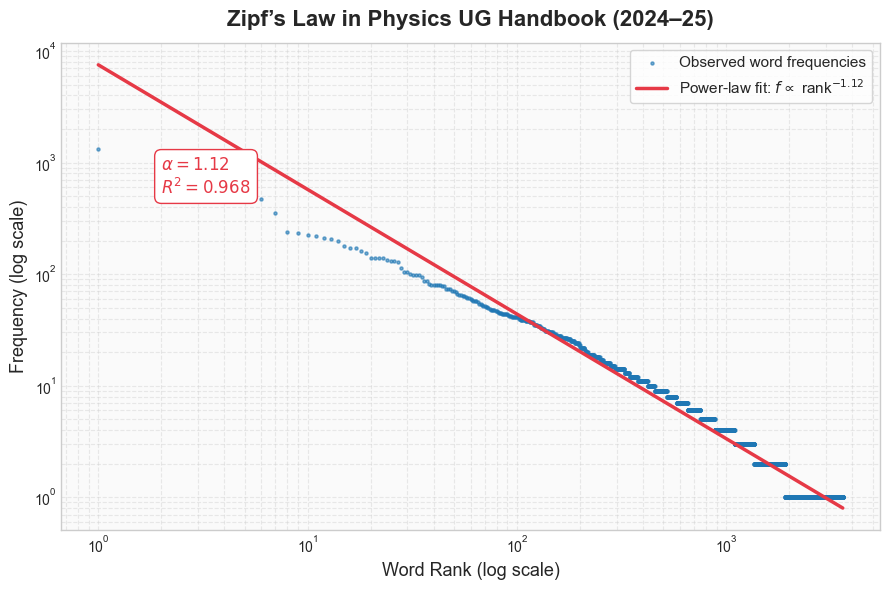

Top 5 most frequent words:
         the : 1314
          of : 1232
         and : 1183
          in : 820
          to : 545

Least 5 frequent words:
  entangleme : 1
          nt : 1
    measures : 1
   entropies : 1
  teleportation : 1


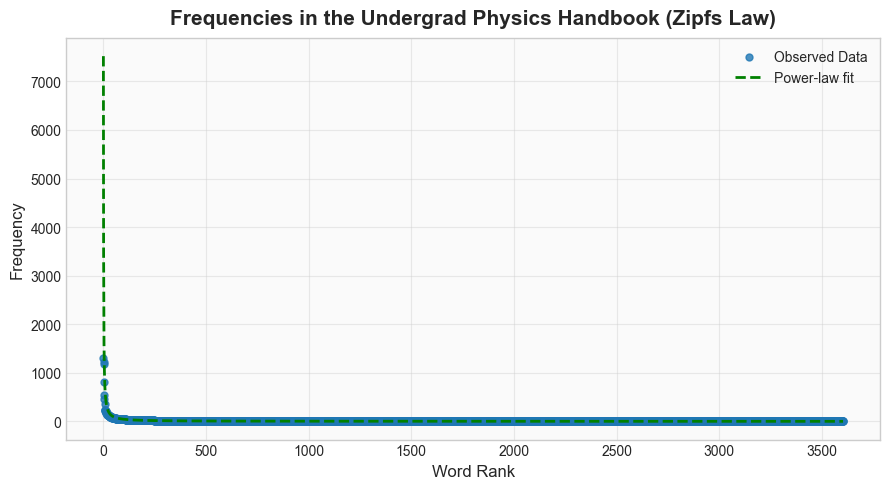

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PyPDF2 import PdfReader
from scipy.stats import linregress

pdf_path = "/Users/mattthew/Downloads/Physics-UG-Handbook-2024-25-(1).pdf"

# === Step 1: Read PDF ===
reader = PdfReader(pdf_path)

text = ""
for page in reader.pages:
    txt = page.extract_text()
    if txt:
        text += txt + " "

# === Step 2: Tokenize and count words ===
words = re.findall(r"\b[a-zA-Z']+\b", text.lower())
word_counts = Counter(words)
print(f"Total unique words: {len(word_counts)}")

# Sort by frequency
sorted_counts = word_counts.most_common()
ranks = np.arange(1, len(sorted_counts) + 1)
frequencies = np.array([freq for _, freq in sorted_counts])

# === Step 3: Linear regression in log-log space ===
log_ranks = np.log(ranks)
log_freqs = np.log(frequencies)

slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_freqs)
alpha = -slope
A = np.exp(intercept)

print(f"\nEstimated Zipf exponent α ≈ {alpha:.2f}")
print(f"R² goodness of fit = {r_value**2:.3f}\n")

# === Step 4: Smooth power-law fit ===
fit_ranks = np.logspace(np.log10(1), np.log10(max(ranks)), 1000)
fit_freqs = A * fit_ranks**(slope)

# === Step 5: Enhanced Zipf’s Law plot ===
plt.figure(figsize=(9, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Scatter data (real frequencies)
plt.scatter(ranks, frequencies, s=5, alpha=0.6, color="#1f77b4", label="Observed word frequencies")

# Power-law fit curve
plt.plot(fit_ranks, fit_freqs, color="#E63946", linewidth=2.5,
         label=fr"Power-law fit: $f \propto$ rank$^{{{slope:.2f}}}$")

# Log scales
plt.xscale("log")
plt.yscale("log")

# Labels & title
plt.xlabel("Word Rank (log scale)", fontsize=13)
plt.ylabel("Frequency (log scale)", fontsize=13)
plt.title("Zipf’s Law in Physics UG Handbook (2024–25)", fontsize=16, fontweight='bold', pad=12)

# Text annotation for exponent
plt.text(2, max(frequencies)*0.4,
         fr"$\alpha = {alpha:.2f}$" "\n" + fr"$R^2 = {r_value**2:.3f}$",
         fontsize=12, color="#E63946",
         bbox=dict(facecolor='white', edgecolor='#E63946', boxstyle='round,pad=0.4'))

# Cosmetic polish
plt.legend(frameon=True, fontsize=11)
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.gca().set_facecolor("#fafafa")
plt.tight_layout()
plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/zipf_powerlaw_fit_improved.pdf", dpi=300, bbox_inches='tight')
plt.show()

# === Step 6: Print top and least frequent words ===
print("Top 5 most frequent words:")
for word, freq in sorted_counts[:5]:
    print(f"  {word:>10s} : {freq}")

print("\nLeast 5 frequent words:")
for word, freq in sorted_counts[-5:]:
    print(f"  {word:>10s} : {freq}")

# === Optional: Top 100 word frequencies ===
plt.figure(figsize=(9, 5))
plt.style.use('seaborn-v0_8-whitegrid')

def plot_zipf_curve(x):  # use fitted A and slope
    return A * x**slope

plt.plot(ranks, frequencies, 'o', markersize=5,
         color='#1f77b4', alpha=0.8, label='Observed Data')
plt.plot(ranks, plot_zipf_curve(ranks), 'g--', linewidth=2,
         label='Power-law fit')

plt.xlabel("Word Rank", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequencies in the Undergrad Physics Handbook (Zipfs Law)", fontsize=15, fontweight='bold', pad=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.4)
plt.gca().set_facecolor("#fafafa")
plt.tight_layout()
plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/zipf_top100_improved.pdf", dpi=300, bbox_inches='tight')
plt.show()
